In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [34]:
crash = pd.read_csv('Data/CGR_Crash_Data.csv')
crash.head(3)

,X,Y,OBJECTID,ROADSOFTID,BIKE,CITY,CRASHDATE,CRASHSEVER,CRASHTYPE,WORKZNEACT,...,VEH3DIR,VEH3TYPE,VEH3USE,WEATHER,WHEREONRD,YEAR,RDCITYTWP,RDNUMLANES,RDWIDTH,FRAMEWORK
0,-85.639647,42.927216,6001,929923,No,Grand Rapids,2007-02-16,Property Damage Only,Side-Swipe Same,Uncoded & Errors,...,U,Uncoded & Errors,Uncoded & Errors,Cloudy,On the Road,2007,Grand Rapids,2,42.0,17
1,-85.639487,42.927213,6002,935745,No,Grand Rapids,2007-06-22,Property Damage Only,Side-Swipe Same,Uncoded & Errors,...,U,Uncoded & Errors,Uncoded & Errors,Clear,On the Road,2007,Grand Rapids,2,42.0,17
2,-85.639387,42.927212,6003,926813,No,Grand Rapids,2007-01-08,Property Damage Only,Head-on,Work on Shoulder / Median,...,U,Uncoded & Errors,Uncoded & Errors,Snow,On the Road,2007,Grand Rapids,2,42.0,17


In [32]:
crash.VEH3TYPE.value_counts()

Uncoded & Errors            67212
Passenger Car, SUV, Van      4788
Pickup Truck                  503
Motorhome                     327
Truck Under 10,000 lbs         63
Truck / Bus (Commercial)       62
Other Non-Commercial           10
Motorcycle                     10
Go-cart / Golf Cart             2
Name: VEH3TYPE, dtype: int64

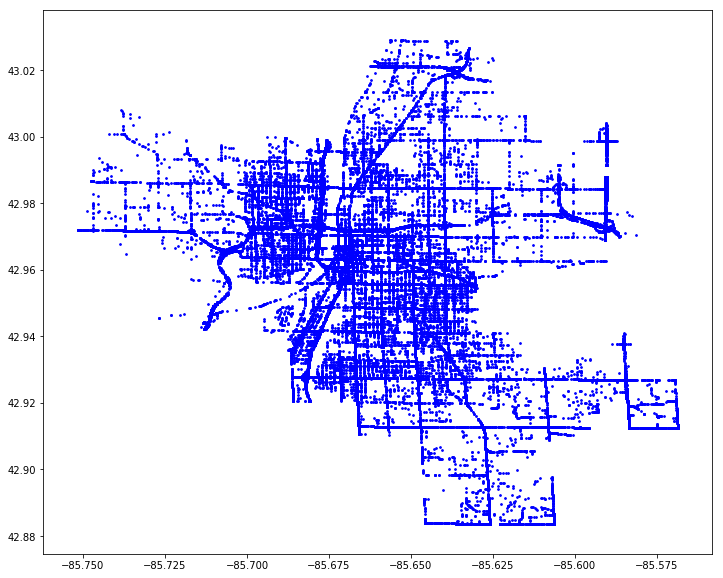

In [19]:
fig, ax = plt.subplots(figsize=(12,10))

ax.scatter(crash.X, crash.Y, c='blue', s=3)

plt.savefig('Beamer/Figures/coords_graphed.png')
plt.show()

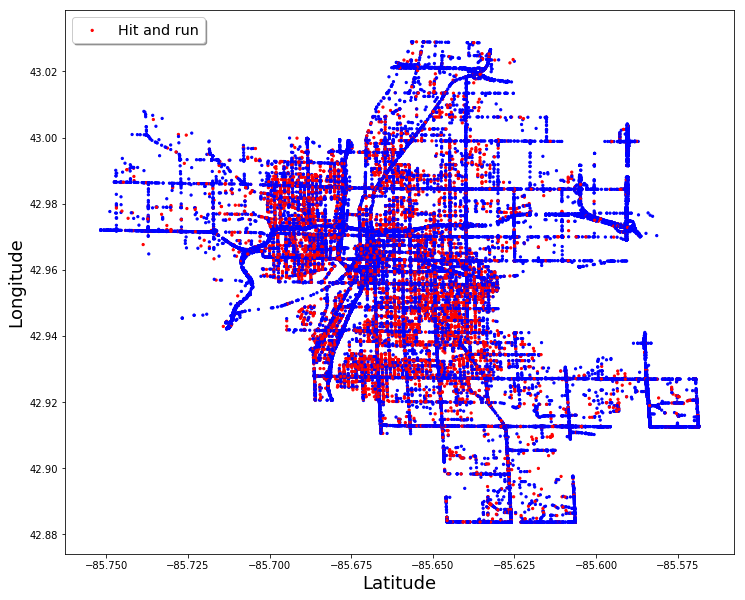

In [26]:
# Visualizing Hit and Runs
# It appears that hit and runs are much less likely to occur on the mianroads/highways
fig, ax = plt.subplots(figsize=(12,10))

colors = {'Yes':'red', 'No':'blue'}

ax.scatter(crash.X, crash.Y, c=crash.HITANDRUN.apply(lambda x: colors[x]), s=5)
ax.legend(('Hit and run', 'Not hit and run'),
           loc='upper left', shadow=True, fontsize = 'x-large')
ax.set_xlabel('Latitude', fontsize=18)
ax.set_ylabel('Longitude', fontsize=18)

plt.savefig('Beamer/Figures/coords_graphed_hitnrun.png')
plt.show()

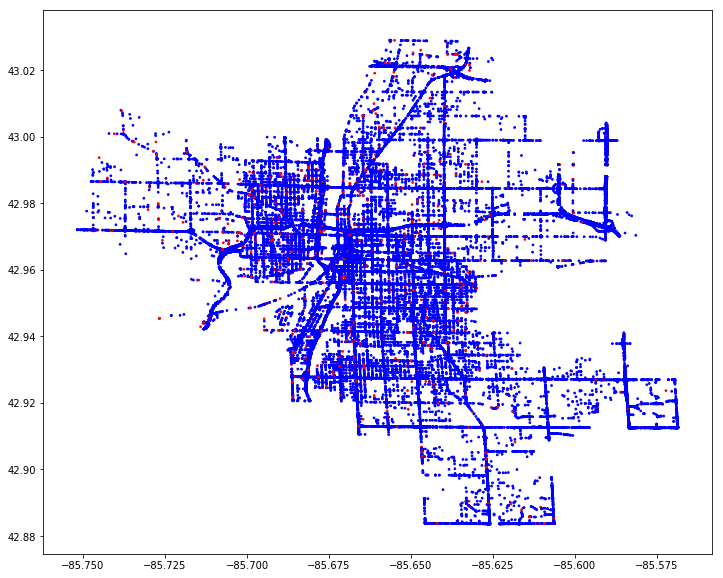

In [15]:
# Visualizing drunk drivers
fig, ax = plt.subplots(figsize=(12,10))

colors = {'Yes':'red', 'No':'blue', 'Uncoded & Errors': 'blue'}

ax.scatter(crash.X, crash.Y, c=crash.D1DRINKIN.apply(lambda x: colors[x]), s=3)

plt.show()

There are 8979 Driver 1's recorded as being 999 years-old.


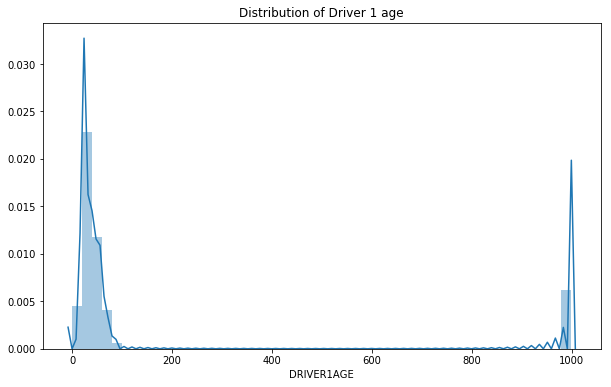

In [45]:
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title('Distribution of Driver 1 age')
sns.distplot(crash.DRIVER1AGE)

In [46]:
print('There are', crash.DRIVER1AGE[crash.DRIVER1AGE == 999].count(), "driver 1's recorded as being 999 years-old.")

There are 8979 driver 1's recorded as being 999 years-old.


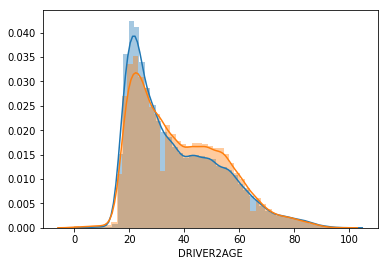

In [6]:
# In this category, unrecorded data seemed to be set to 999, so I quickly used this filter to look at only the valid ages
# Driver 1 is in blue, Driver 2 is in orange
# I'm not sure exactly how they defined "driver 1" v. "driver 2". Maybe "Driver 1" is responsible for the crash?
temp_age1 = crash.DRIVER1AGE[crash.DRIVER1AGE < 100]
temp_age2 = crash.DRIVER2AGE[crash.DRIVER2AGE < 100]
sns.distplot(temp_age1)
sns.distplot(temp_age2)

---

In [10]:
gp_by_year = crash.groupby(['D1DRINKIN', 'HITANDRUN'])
count_by_year = gp_by_year.size().unstack()
count_by_year

HITANDRUN,No,Yes
D1DRINKIN,,
No,55356,14904
Yes,1952,765


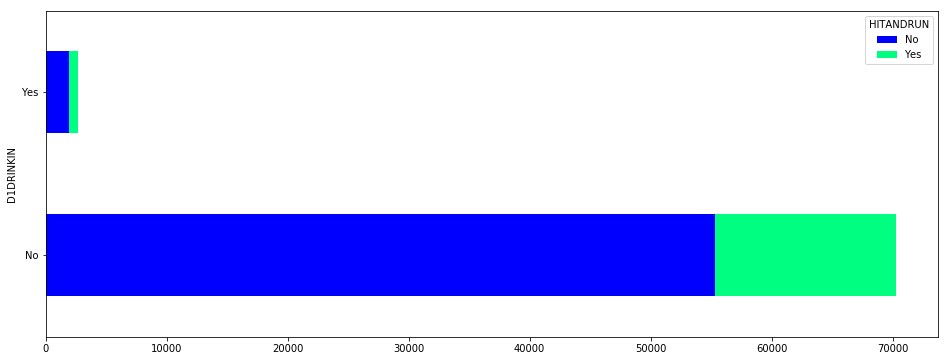

In [36]:
count_by_year.plot(kind='barh', stacked=True, figsize=[16,6], colormap='winter')
    